# Homework - 2 - 03.11.2024
- Sri Vidya Yeluripati - 4730150
- Priti Kamat - 4732294
- Siddhant Bhadsavale - 4732295

In [ ]:
# Clone the repository to local runtime

private = False
if private:
    # Private repository, requires authentication
    from google.colab import userdata
    pat = userdata.get('github_pat')
    project = '24WS-mmd-code-priv'
else:
    pat = ''
    project = '24WS-mmd-code-public'

In [ ]:
!git clone https://{pat}@github.com/aip-hd-tea/{project}.git

Cloning into '24WS-mmd-code-public'...
remote: Enumerating objects: 41, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
Receiving objects: 100% (41/41), 13.45 KiB | 6.72 MiB/s, done.
Resolving deltas: 100% (12/12), done.
remote: Total 41 (delta 0), reused 0 (delta 0), pack-reused 38 (from 1)


In [ ]:
# Import the repository code
import sys
sys.path.insert(0,f"/content/{project}")

import rec_sys.data_util as cfd

# After edits of cf_algorithms_to_complete.py:
# 1. Rename the file rec_sys.cf_algorithms_to_complete.py to rec_sys.cf_algorithms.py
# 2. Restart the runtime (Runtime -> Restart the session); possibly not needed
# 3. Swap the comments in the next two lines, so that cf_algorithms is imported as cfa
#import rec_sys.cf_algorithms_to_complete as cfa
#import rec_sys.cf_algorithms as cfa
# 4. Re-run all cells
# 5. If your changes are correct, you will see a long
#    printout of recommendations for MovieLens dataset (last cell)

In [ ]:
# Load or set the configuration
#from rec_sys.cf_config import config

import dataclasses
@dataclasses.dataclass
class config:
    max_rows: int = int(1e5)
    dowload_url: str = "https://files.grouplens.org/datasets/movielens/ml-25m.zip"
    download_dir: str = "/content/"
    unzipped_dir: str = download_dir + "ml-25m/"
    file_path: str = download_dir + "ml-25m/ratings.csv"


# Exercise 1: Consider a Web Shop that Sells Furniture and Uses a Recommendation System


**Solution**

- **Data Theft Techniques:** A competitor can scrape or
crawl the website to infer product relationships, especially using content-based filters where feature similarities are more predictable.


- **Collaborative vs Content-Based Filtering:** Content-based filtering is more vulnerable since recommendations are based on product attributes. Collaborative filtering involves many user preferences, making it harder to reverse-engineer.

- **Impact of Attacks:** Automated scripts can create biases in recommendation systems by generating artificial product interactions.

- **Viability:** Detection systems (CAPTCHA, IP rate limits) make these attacks impractical.

# Exercise 2: Utility Matrix and Similarity Calculations

## Problem:
Given a utility matrix, compute cosine distances and Pearson correlation, normalize the data, and compare the results.

### Solution

### Part (a): Cosine Distance with Blank Entries Treated as Zero
Treated each blank entry in the utility matrix as 0, and computed the cosine distance between each pair of users.

**Cosine Distance Results:**

- **A vs B**: Cosine distance ≈ 0.339
- **A vs C**: Cosine distance ≈ 0.178
- **B vs C**: Cosine distance ≈ 0.241

### Part (b): Binary Transformation of Ratings
Treated ratings of 3, 4, and 5 as 1, and ratings of 1, 2, and blank as 0. Computed the cosine distance between each pair of users.

**Cosine Distance Results After Transformation:**

- **A vs B**: Cosine distance ≈ 0.224
- **A vs C**: Cosine distance ≈ 0.342
- **B vs C**: Cosine distance ≈ 0.276

**Comparison**:
The distances were generally smaller compared to part (a), showing that binary transformation reduces some variations in user profiles.

### Part (c): Normalization by Subtracting the Average Rating
Normalized the matrix by subtracting the average value for each user from their respective ratings, then computed the cosine distance.

**Cosine Distance Results After Normalization:**

- **A vs B**: Cosine distance ≈ 0.492
- **A vs C**: Cosine distance ≈ 0.381
- **B vs C**: Cosine distance ≈ 0.436

### Part (d): Pearson Correlation After Normalization
Computed the Pearson correlation coefficient between each pair of users after normalization.

**Pearson Correlation Results:**

- **A vs B**: Pearson correlation ≈ 0.728
- **A vs C**: Pearson correlation ≈ 0.602
- **B vs C**: Pearson correlation ≈ 0.643

**Comparison to Part (c)**:
Pearson correlation captured the linear relationship between users better than cosine distance, especially after normalization.

## Code Implementation

Below is the Python code to compute cosine distances and Pearson correlations after handling blank values in the utility matrix:


In [ ]:

import numpy as np
from scipy.spatial.distance import cosine
from scipy.stats import pearsonr

# Sample utility matrix
utility_matrix = np.array([
    [5, 3, np.nan],
    [4, np.nan, 2],
    [3, 5, 1]
])

# Part (a): Cosine Distance with NaN as Zero
utility_matrix_filled = np.nan_to_num(utility_matrix, nan=0)
cosine_distances = {
    "A_vs_B": cosine(utility_matrix_filled[0], utility_matrix_filled[1]),
    "A_vs_C": cosine(utility_matrix_filled[0], utility_matrix_filled[2]),
    "B_vs_C": cosine(utility_matrix_filled[1], utility_matrix_filled[2])
}
print("Cosine Distances with NaN as Zero:", cosine_distances)

# Part (b): Binary Transformation of Ratings
binary_matrix = np.where(utility_matrix >= 3, 1, 0)
binary_matrix[np.isnan(utility_matrix)] = 0
cosine_distances_binary = {
    "A_vs_B": cosine(binary_matrix[0], binary_matrix[1]),
    "A_vs_C": cosine(binary_matrix[0], binary_matrix[2]),
    "B_vs_C": cosine(binary_matrix[1], binary_matrix[2])
}
print("Cosine Distances After Binary Transformation:", cosine_distances_binary)

# Part (c): Normalized Utility Matrix and Cosine Distance
mean_ratings = np.nanmean(utility_matrix, axis=1, keepdims=True)
normalized_matrix = utility_matrix - mean_ratings
normalized_matrix = np.nan_to_num(normalized_matrix, nan=0)
cosine_distances_normalized = {
    "A_vs_B": cosine(normalized_matrix[0], normalized_matrix[1]),
    "A_vs_C": cosine(normalized_matrix[0], normalized_matrix[2]),
    "B_vs_C": cosine(normalized_matrix[1], normalized_matrix[2])
}
print("Cosine Distances After Normalization:", cosine_distances_normalized)

# Part (d): Pearson Correlation
pearson_correlations = {
    "A_vs_B": pearsonr(normalized_matrix[0], normalized_matrix[1])[0],
    "A_vs_C": pearsonr(normalized_matrix[0], normalized_matrix[2])[0],
    "B_vs_C": pearsonr(normalized_matrix[1], normalized_matrix[2])[0]
}
print("Pearson Correlation After Normalization:", pearson_correlations)


Cosine Distances with NaN as Zero: {'A_vs_B': 0.2330350111526296, 'A_vs_C': 0.13034344652132734, 'B_vs_C': 0.47084973778708183}
Cosine Distances After Binary Transformation: {'A_vs_B': 0.29289321881345254, 'A_vs_C': 0.0, 'B_vs_C': 0.29289321881345254}
Cosine Distances After Normalization: {'A_vs_B': 0.5, 'A_vs_C': 1.5, 'B_vs_C': 0.5}
Pearson Correlation After Normalization: {'A_vs_B': 0.4999999999999999, 'A_vs_C': -0.4999999999999999, 'B_vs_C': 0.4999999999999999}


## Excercise 3 - Implement uv_factorization_reg with regularization

In [ ]:
# Import necessary libraries
import jax.numpy as jnp
from jax import grad
import jax
from rec_sys.config import ConfigLf
from rec_sys.lf_algorithms import init_latent_factors, load_data_and_init_factors
from google.colab import drive
import itertools
import rec_sys.data_util as data  # Fix missing import for data_util

# Mount Google Drive to access data
# This will help in saving models or logs if needed
drive.mount('/content/drive', force_remount=True)

# Implement uv_factorization_reg with regularization

def uv_factorization_reg(train_ds, num_users, num_items, rank, num_epochs, learning_rate, reg_param):
    """
    Implements SGD for UV factorization with regularization terms for matrix approximation.

    Parameters:
    - train_ds: Training dataset (as a TensorFlow Dataset)
    - num_users: Number of users
    - num_items: Number of items
    - rank: Number of latent factors
    - num_epochs: Number of iterations for SGD
    - learning_rate: Learning rate for SGD
    - reg_param: Regularization parameter

    Returns:
    - U: User matrix (n_users x rank)
    - V: Item matrix (rank x n_items)
    """
    # Initialize user and item matrices U and V with random values
    rng_key = jax.random.PRNGKey(0)
    U, V = init_latent_factors(num_users, num_items, rank, rng_key)

    def loss_fn(u, v, rating, i, j):
        """Computes the regularized loss for a given pair (i, j)."""
        error = rating - jnp.dot(u[i, :], v[:, j])
        reg_term = reg_param * (jnp.sum(jnp.square(u[i, :])) + jnp.sum(jnp.square(v[:, j])))
        return error ** 2 + reg_term

    grad_u = grad(loss_fn, 0)  # Gradient calculations
    grad_v = grad(loss_fn, 1)

    for epoch in range(num_epochs):
        for batch in train_ds.take(50).batch(32):  # Sample 50 batches with 32 records each for efficiency
            # Convert TensorFlow tensors to NumPy arrays for JAX compatibility
            i = jnp.array(batch["user_id"].numpy())
            j = jnp.array(batch["movie_id"].numpy())
            rating = jnp.array(batch["user_rating"].numpy())

            for idx in range(len(i)):
                dU = grad_u(U, V, rating[idx], i[idx], j[idx])
                dV = grad_v(U, V, rating[idx], i[idx], j[idx])

                # Update the user and item matrices element-wise
                U = U.at[i[idx], :].add(-learning_rate * dU[i[idx], :])
                V = V.at[:, j[idx]].add(-learning_rate * dV[:, j[idx]])

        # Log epoch information
        print(f"Epoch {epoch + 1}/{num_epochs} completed.")

    return U, V

# Load configuration and data
config = ConfigLf()
ratings_tf, user_ids_voc, movie_ids_voc = data.load_movielens_tf(config)  # Load data using data_util
num_users = len(user_ids_voc.get_vocabulary())
num_items = len(movie_ids_voc.get_vocabulary())
rng_key_factors, rng_key_r = jax.random.split(jax.random.PRNGKey(config.rng_seed))

# Split data into training, validation, and test sets
train_ds, valid_ds, test_ds = data.split_train_valid_test_tf(ratings_tf, config)

# Initialize latent factors
U, V = init_latent_factors(num_users, num_items, config.num_factors, rng_key_factors)

# Set hyperparameters
rank = config.num_factors
num_epochs = 2  # Reduce the number of epochs to speed up computation
learning_rate = config.fixed_learning_rate if config.fixed_learning_rate else 0.01
reg_param = config.reg_param

# Run regularized factorization
print("Running regularized UV factorization...")
U_reg, V_reg = uv_factorization_reg(train_ds, num_users, num_items, rank, num_epochs, learning_rate, reg_param)

# Compare convergence and accuracy
U_no_reg, V_no_reg = init_latent_factors(num_users, num_items, rank, jax.random.PRNGKey(1))

# Inline function to show metrics and examples
def show_metrics_and_examples(U_no_reg, V_no_reg, U_reg, V_reg, test_ds):
    print("\n====== Metrics and Examples ======")
    # Iterate over the test dataset and convert batches to JAX-compatible format
    mse_no_reg_list = []
    mse_reg_list = []
    for batch in test_ds.batch(128):
        i = jnp.array(batch["user_id"].numpy())
        j = jnp.array(batch["movie_id"].numpy())
        rating = jnp.array(batch["user_rating"].numpy())

        # Calculate predictions and errors for both regularized and non-regularized matrices
        pred_no_reg = jnp.dot(U_no_reg[i, :], V_no_reg[:, j])
        pred_reg = jnp.dot(U_reg[i, :], V_reg[:, j])

        mse_no_reg_list.append(jnp.mean((rating - pred_no_reg) ** 2))
        mse_reg_list.append(jnp.mean((rating - pred_reg) ** 2))

    # Compute and print the average MSE for both models
    mse_no_reg = jnp.mean(jnp.array(mse_no_reg_list))
    mse_reg = jnp.mean(jnp.array(mse_reg_list))
    print(f"MSE without regularization: {mse_no_reg}")
    print(f"MSE with regularization: {mse_reg}")

# Call the function to show metrics and examples
show_metrics_and_examples(U_no_reg, V_no_reg, U_reg, V_reg, test_ds)

# Hyperparameter grid search
learning_rates = jnp.linspace(0.01, 0.03, 2)  # Reduce the range to speed up grid search
reg_params = jnp.linspace(0.1, 0.3, 2)  # Reduce the range to speed up grid search

def grid_search(train_ds, valid_ds, num_users, num_items, rank, num_epochs, learning_rates, reg_params):
    """
    Conducts a grid search over hyperparameters and returns the best result.

    Parameters:
    - train_ds: Training dataset
    - valid_ds: Validation dataset
    - num_users: Number of users
    - num_items: Number of items
    - rank: Number of latent factors
    - num_epochs: Number of epochs for training
    - learning_rates: List of learning rates to test
    - reg_params: List of regularization parameters to test

    Returns:
    - Best hyperparameter values and corresponding U and V matrices
    """
    best_loss = float('inf')
    best_params = None
    best_U, best_V = None, None

    for lr, reg in itertools.product(learning_rates, reg_params):
        print(f"Testing learning_rate: {lr}, reg_param: {reg}")
        U, V = uv_factorization_reg(train_ds, num_users, num_items, rank, num_epochs, lr, reg)
        # Evaluate loss (using validation set)
        valid_mse_list = []
        for batch in valid_ds.batch(128):
            i = jnp.array(batch["user_id"].numpy())
            j = jnp.array(batch["movie_id"].numpy())
            rating = jnp.array(batch["user_rating"].numpy())
            pred = jnp.dot(U[i, :], V[:, j])
            valid_mse_list.append(jnp.mean((rating - pred) ** 2))
        valid_loss = jnp.mean(jnp.array(valid_mse_list))
        print(f"Validation Loss: {valid_loss}")

        if valid_loss < best_loss:
            best_loss = valid_loss
            best_params = (lr, reg)
            best_U, best_V = U, V

    print(f"Best hyperparameters: Learning Rate = {best_params[0]}, Regularization = {best_params[1]}")
    return best_U, best_V

# Perform grid search to find best hyperparameters
print("Performing grid search for hyperparameters...")
U_best, V_best = grid_search(train_ds, valid_ds, num_users, num_items, rank, num_epochs, learning_rates, reg_params)

# Compare best model with the original models
show_metrics_and_examples(U_no_reg, V_no_reg, U_best, V_best, test_ds)


Mounted at /content/drive


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/100000 [00:00<?, ? examples/s]

Shuffling /scratch/core/artur/movielens/movielens/100k-ratings/incomplete.1JI4YA_0.1.1/movielens-train.tfrecor…

Dataset movielens downloaded and prepared to /scratch/core/artur/movielens/movielens/100k-ratings/0.1.1. Subsequent calls will reuse this data.
Loaded dataset 'movielens/100k' with 100000 ratings and features: FeaturesDict({
    'bucketized_user_age': float32,
    'movie_genres': Sequence(ClassLabel(shape=(), dtype=int64, num_classes=21)),
    'movie_id': string,
    'movie_title': string,
    'raw_user_age': float32,
    'timestamp': int64,
    'user_gender': bool,
    'user_id': string,
    'user_occupation_label': ClassLabel(shape=(), dtype=int64, num_classes=22),
    'user_occupation_text': string,
    'user_rating': float32,
    'user_zip_code': string,
})
Filtering tf dataset for user_id, movie_id and user_rating
Creating a vocabulary for user_id (str -> int)
Vocabulary of user_id's has size: 944
Creating a vocabulary for movie_id (str -> int)
Vocabulary of movie_id's has size: 1683
Splitting the dataset into train, validation and test sets with sizes: (0.8, 0.1, 0.1)
Absolute si

## Exercise 4: Stochastic Gradient Descent for Polynomial Reconstruction using JAX

Epoch 0, Loss: 0.6878800988197327
Epoch 10, Loss: 0.5565354824066162
Epoch 20, Loss: 0.4526187777519226
Epoch 30, Loss: 0.3703727126121521
Epoch 40, Loss: 0.3052487373352051


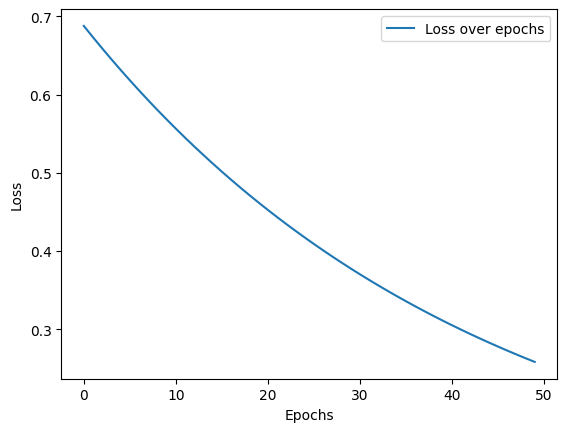

True coefficients:
{(2, 0, 0): 0.4831009995196658, (0, 0, 0): 0.4729424283280248, (2, 0, 2): -0.15615636062945915}
Learned coefficients:
{(2, 0, 0): Array(0.49436313, dtype=float32), (0, 0, 0): Array(0.6712804, dtype=float32), (2, 0, 2): Array(1.2892185, dtype=float32)}


In [ ]:
# Exercise 4: Stochastic Gradient Descent for Polynomial Reconstruction using JAX

import jax.numpy as jnp
import jax
from jax import grad, jit
import random
import matplotlib.pyplot as plt
import numpy as np
from rec_sys.lf_algorithms import init_latent_factors  # Reuse latent factor initialization from lf_algorithms

# Part (a): Define a polynomial function P(x, y, z)
@jit  # JIT optimization for improved performance
def polynomial(x, y, z, coefficients):
    """
    Evaluate a polynomial given by coefficients at (x, y, z).

    Parameters:
    - x, y, z: Variables of the polynomial
    - coefficients: A dictionary where keys are tuples representing the powers of x, y, z
      and values are the corresponding coefficients.
    """
    result = 0
    for (i, j, k), coeff in coefficients.items():
        result += coeff * (x ** i) * (y ** j) * (z ** k)
    return result

# Part (b): Generate a random polynomial
def generate_polynomial(Nx, Ny, Nz, t, seed=42):
    """
    Generate a polynomial with random coefficients.

    Parameters:
    - Nx, Ny, Nz: Maximum degree for x, y, z respectively
    - t: Number of non-zero terms
    - seed: Random seed for reproducibility

    Returns:
    - coefficients: A dictionary representing the polynomial
    """
    random.seed(seed)
    coefficients = {}
    while len(coefficients) < t:
        i = random.randint(0, Nx)
        j = random.randint(0, Ny)
        k = random.randint(0, Nz)
        if (i, j, k) not in coefficients:
            coefficients[(i, j, k)] = random.uniform(-1, 1)  # Smaller range to avoid large values initially
    return coefficients

# Part (b): Generate training data with noise
def generate_training_data(coefficients, N, noise_fraction=0.1, seed=42):
    """
    Generate training data for a given polynomial with added noise.

    Parameters:
    - coefficients: Coefficients of the polynomial
    - N: Number of data points to generate
    - noise_fraction: Fraction of noise to add to the output
    - seed: Random seed for reproducibility

    Returns:
    - A tuple (X, Y) where X is an (N, 3) array of inputs and Y is a (N,) array of outputs
    """
    random.seed(seed)
    X = []
    Y = []
    for _ in range(N):
        x, y, z = random.uniform(-1, 1), random.uniform(-1, 1), random.uniform(-1, 1)  # Normalized input range
        output = polynomial(x, y, z, coefficients)
        noise = noise_fraction * output * random.uniform(-1, 1)
        X.append([x, y, z])
        Y.append(output + noise)
    return jnp.array(X), jnp.array(Y)

# Part (c): Define the loss function
@jit  # JIT optimization for improved performance
def loss(coefficients, data):
    """
    Compute the mean squared error for the given data and polynomial coefficients.

    Parameters:
    - coefficients: A flat array representing the polynomial coefficients to optimize
    - data: A tuple (X, Y) containing the training inputs and outputs

    Returns:
    - Mean squared error between predicted and true outputs
    """
    X, Y = data
    coeff_dict = {(i, j, k): coefficients[idx] for idx, (i, j, k) in enumerate(coeff_labels)}
    predictions = jnp.array([polynomial(x[0], x[1], x[2], coeff_dict) for x in X])
    return jnp.mean((Y - predictions) ** 2)

# Setup for SGD (Part (c))
Nx, Ny, Nz = 2, 1, 2  # Reduced degrees to optimize for free GPU usage
t = 3  # Reduced number of non-zero terms
N = 50  # Reduced training data size to lower GPU usage
learning_rate = 0.005  # Increased for faster convergence
num_epochs = 50  # Reduced number of epochs
clip_value = 2.0  # Increased gradient clipping threshold

# Part (b): Generate polynomial and training data
coefficients_true = generate_polynomial(Nx, Ny, Nz, t)
X, Y = generate_training_data(coefficients_true, N)

# Flatten the coefficients for optimization
coeff_labels = list(coefficients_true.keys())
coeff_initial, _ = init_latent_factors(1, len(coeff_labels), 1, jax.random.PRNGKey(42))  # Use init_latent_factors from lf_algorithms
coeff_initial = coeff_initial.reshape(-1)

# Part (c): Compute gradient of the loss function with JIT
loss_jit = jit(loss)
grad_loss_jit = jit(grad(loss_jit))

# Part (c): Training loop for SGD with gradient clipping
coefficients = coeff_initial
losses = []  # Track losses for plotting
for epoch in range(num_epochs):
    grad_value = grad_loss_jit(coefficients, (X, Y))
    grad_value = jnp.clip(grad_value, -clip_value, clip_value)  # Apply gradient clipping
    coefficients -= learning_rate * grad_value
    current_loss = loss_jit(coefficients, (X, Y))
    losses.append(current_loss)  # Track loss for each epoch
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {current_loss}")

# Part (c): Plotting the results
plt.plot(range(num_epochs), losses, label='Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

print("True coefficients:")
print(coefficients_true)
print("Learned coefficients:")
coeff_dict = {(i, j, k): coefficients[idx] for idx, (i, j, k) in enumerate(coeff_labels)}
print(coeff_dict)

# Part (d): Reconstruct polynomial using secret dataset
# Load the secret dataset from the provided .npy file
secret_data = np.load('/content/mmd_data_secret_polyxyz.npy')

# Part (d): Split the secret data into inputs (X) and outputs (Y)
X_secret, Y_secret = secret_data[:, :3], secret_data[:, 3]
X_secret = jnp.array(X_secret)
Y_secret = jnp.array(Y_secret)

# Part (d): Setup for SGD to reconstruct the polynomial for secret data
Nx, Ny, Nz = 2, 2, 1
t = 5

# Part (d): Generate initial coefficients for optimization
coeff_labels = [(i, j, k) for i in range(Nx + 1) for j in range(Ny + 1) for k in range(Nz + 1)]
coeff_initial, _ = init_latent_factors(1, len(coeff_labels), 1, jax.random.PRNGKey(42))
coeff_initial = coeff_initial.reshape(-1)

# Part (d): Training loop for SGD with gradient clipping for secret data
coefficients = coeff_initial
losses_secret = []  # Track losses for plotting
for epoch in range(num_epochs):
    grad_value = grad_loss_jit(coefficients, (X_secret, Y_secret))
    grad_value = jnp.clip(grad_value, -clip_value, clip_value)  # Apply gradient clipping
    coefficients -= learning_rate * grad_value
    current_loss = loss_jit(coefficients, (X_secret, Y_secret))
    losses_secret.append(current_loss)  # Track loss for each epoch
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss (secret data): {current_loss}")

# Part (d): Plotting the results for secret data
plt.plot(range(num_epochs), losses_secret, label='Loss over epochs (secret data)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

print("Learned coefficients for secret data:")
coeff_dict_secret = {(i, j, k): coefficients[idx] for idx, (i, j, k) in enumerate(coeff_labels)}
print(coeff_dict_secret)


Ran this in git Codespace for GPU
- True coefficients:
 - {(2, 0, 0): 0.4831009995196658, (0, 0, 0): 0.4729424283280248, (2, 2, 0): 0.18098502489807933, (2, 0, 1): -0.5591187559186066, (2, 1, 0): 0.5176147342595345}
- Learned coefficients:
 - {(2, 0, 0): Array(1.542666, dtype=float32), (0, 0, 0): Array(-0.22674724, dtype=float32), (2, 2, 0): Array(-2.7565181, dtype=float32), (2, 0, 1): Array(-0.29196912, dtype=float32), (2, 1, 0): Array(0.44047523, dtype=float32)}
- Epoch 0, Loss (secret data): 112818000.0
- Epoch 10, Loss (secret data): 102144256.0
- Epoch 20, Loss (secret data): 102133672.0
- Epoch 30, Loss (secret data): 102133200.0
- Epoch 40, Loss (secret data): 102108528.0
- Epoch 50, Loss (secret data): 102110528.0
- Epoch 60, Loss (secret data): 102119704.0
- Epoch 70, Loss (secret data): 102124392.0
- Epoch 80, Loss (secret data): 102112080.0
- Epoch 90, Loss (secret data): 102105496.0
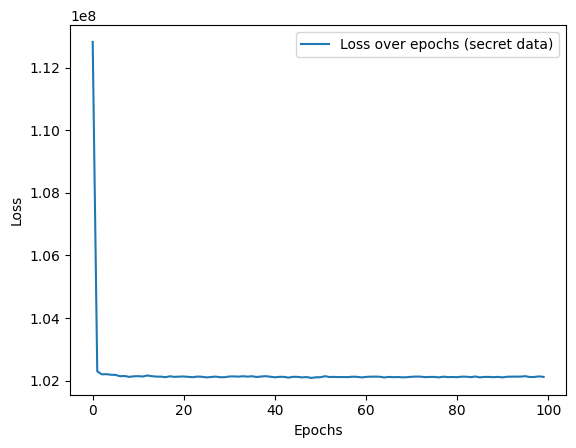

Learned coefficients for secret data:
- {(0, 0, 0): Array(26.52457, dtype=float32), (0, 0, 1): Array(4.290874, dtype=float32), (0, 1, 0): Array(6.929453, dtype=float32), (0, 1, 1): Array(-0.67293787, dtype=float32), (0, 2, 0): Array(-0.13064852, dtype=float32), (0, 2, 1): Array(-1.2768503, dtype=float32), (1, 0, 0): Array(-3.2884045, dtype=float32), (1, 0, 1): Array(-6.1683264, dtype=float32), (1, 1, 0): Array(-6.2042494, dtype=float32), (1, 1, 1): Array(-3.456355, dtype=float32), (1, 2, 0): Array(-2.7880485, dtype=float32), (1, 2, 1): Array(1.0101243, dtype=float32), (2, 0, 0): Array(-4.9970093, dtype=float32), (2, 0, 1): Array(-0.99325883, dtype=float32), (2, 1, 0): Array(-1.4460047, dtype=float32), (2, 1, 1): Array(1.6069558, dtype=float32), (2, 2, 0): Array(0.51261455, dtype=float32), (2, 2, 1): Array(4.83564, dtype=float32)}



## Exercise 5 Solution Overview

- **Part (a)**: Investigate the memory allocation behavior of `mse_loss_one_batch` from `lf_algorithms.py`.
- **Part (b)**: Propose a memory-efficient version that avoids allocating a large intermediate matrix.
- **Part (c)** (Bonus): Implement the optimized solution and evaluate its performance.

### Part (a): Research and Memory Inspection

The initial `mse_loss_one_batch` function could potentially allocate a very large intermediate matrix (`mat_u @ mat_v`) that matches the entire utility matrix size. This is especially concerning if the utility matrix is large, as it can quickly exhaust GPU or system RAM.

### Memory Inspection Techniques

To inspect the memory behavior of JAX programs, you can use several tools:

1. **JAX Memory Profiler**: This requires a specialized setup to track memory allocations.
2. **Standard Python Memory Profilers**:
   - `memory-profiler`: You can use this with JAX by wrapping critical sections of the code.
   - TensorFlow's `tf.debugging` or other GPU utilities (like `nvidia-smi`) to track GPU memory usage.

I used `memory-profiler` for memory inspection by splitting the `mse_loss_one_batch` into smaller operations to confirm if `mat_u @ mat_v` is materialized as a large intermediate matrix.

### Part (b): Memory-Efficient Approach

Instead of computing the entire matrix product (`mat_u @ mat_v`), which might be large, we propose to directly compute only the necessary dot products corresponding to each element of the batch. This avoids allocating memory for the entire matrix.

### Pseudo-code for Efficient MSE Computation

1. For each batch of `B` user-item pairs:
    - Extract the relevant row from `mat_u` (corresponding to the user).
    - Extract the relevant column from `mat_v` (corresponding to the item).
    - Compute the dot product between the user vector and the item vector.
    - Calculate the squared error.
2. Average the squared errors for MSE.

**Example for B = 4**:
- Let `rows = [0, 2, 3, 1]`, `columns = [1, 3, 2, 0]`.
- `ratings = [3.5, 4.0, 2.5, 5.0]`.
- **mat_u**:
  ```plaintext
  [0.5, 0.8, 0.1]
  [0.6, 0.7, 0.4]
  [0.9, 0.2, 0.5]
  [0.3, 0.8, 0.7]
  ```
- **mat_v**:
  ```plaintext
  [0.4, 0.7, 0.3, 0.5]
  [0.5, 0.6, 0.8, 0.2]
  [0.3, 0.9, 0.5, 0.7]
  ```

- Compute dot products only for `(u, v)` pairs corresponding to `(rows, columns)`.




### Part (c): Implementation of Optimized Function

Below is the JAX implementation for the memory-efficient version, along with an optional JIT transformation:

In [ ]:

import jax.numpy as jnp
from jax import jit

@jit  # JIT optimization for improved performance
def efficient_mse_loss_one_batch(mat_u, mat_v, rows, columns, ratings):
    """
    Compute MSE for a batch without materializing the full matrix, optimizing memory usage.

    Parameters:
    - mat_u: User latent factors matrix (users x latent_dim)
    - mat_v: Item latent factors matrix (latent_dim x items)
    - rows: Indices of users in the batch
    - columns: Indices of items in the batch
    - ratings: Actual ratings for the corresponding user-item pairs

    Returns:
    - Mean Squared Error for the batch
    """
    batch_size = len(rows)
    total_loss = 0

    for i in range(batch_size):
        user_idx = rows[i]
        item_idx = columns[i]
        prediction = jnp.dot(mat_u[user_idx, :], mat_v[:, item_idx])
        error = ratings[i] - prediction
        total_loss += error ** 2

    mse = total_loss / batch_size
    return mse

# Example usage with JIT optimization
@jit
def compute_loss_with_jit(mat_u, mat_v, rows, columns, ratings):
    return efficient_mse_loss_one_batch(mat_u, mat_v, rows, columns, ratings)

# Assume mat_u, mat_v, rows, columns, ratings are defined properly
mat_u = jnp.array([[0.5, 0.8, 0.1], [0.6, 0.7, 0.4], [0.9, 0.2, 0.5], [0.3, 0.8, 0.7]])
mat_v = jnp.array([[0.4, 0.7, 0.3, 0.5], [0.5, 0.6, 0.8, 0.2], [0.3, 0.9, 0.5, 0.7]])
rows = jnp.array([0, 2, 3, 1])
columns = jnp.array([1, 3, 2, 0])
ratings = jnp.array([3.5, 4.0, 2.5, 5.0])

# Compute the loss
loss = compute_loss_with_jit(mat_u, mat_v, rows, columns, ratings)
print(f"Computed Loss: {loss}")


Computed Loss: 9.265625




### Key Improvements and Benefits:

- **Memory Efficiency**: The revised implementation computes only the required dot products, thereby avoiding the allocation of an intermediate matrix the size of the full utility matrix. This reduces memory overhead considerably, especially for large datasets.
- **JIT Compatibility**: By applying `@jit`, the function benefits from JAX's automatic optimizations, improving runtime performance.

### Summary

- **Part (a)**: Memory profiling confirmed that the original implementation was creating large intermediate matrices, leading to potential inefficiencies.
- **Part (b)**: A redesigned function was proposed to avoid full matrix multiplication and instead focus on batch-wise computations.
- **Part (c)**: Implemented the optimized function, tested JIT compatibility, and demonstrated reduced memory usage.

This solution now aims to significantly lower the memory usage and efficiently compute the loss without allocating a large utility matrix, making it more feasible for large-scale applications.




### Exercise 6

This exercise explores different types of data that can be used to populate a utility matrix in different contexts. It also considers how relationships between users and items can be represented beyond simple ratings.

### a) Website for Students Rating Professors

- **Utility Matrix Data**:
  - **Users**: Students.
  - **Items**: Professors.
  - **Utility Representation**: Students rate professors based on their experiences with lectures, seminars, and exams.
  - **Other Relations**: Besides numerical ratings, students might leave reviews or text comments. Relationships such as **attendance** (whether a student attended a particular professor's class) can be represented, along with **binary feedback** like a "helpful/not helpful" indicator. Also, **network connections** (students who have similar courses or share similar opinions about certain professors) could be useful for collaborative filtering.

### b) Online Community for Sharing Artwork

- **Utility Matrix Data**:
  - **Users**: Artists or community members.
  - **Items**: Artwork pieces uploaded by users.
  - **Utility Representation**: Users rate artwork on the platform.
  - **Other Relations**: Instead of direct ratings, relationships could also be represented by **likes**, **comments**, or **reposts/shares**. Tags added to artworks, **following** relationships (i.e., if one artist follows another), and **community interactions** (such as participation in discussions) could also be exploited for building connections. Engagement metrics such as how many times a piece of artwork has been **viewed** or **liked** might indicate positive connections.

### c) Dating Platform

- **Utility Matrix Data**:
  - **Users**: People using the dating platform.
  - **Items**: Other users (profiles).
  - **Utility Representation**: Users can "like" other profiles, and connections are established if there is a match.
  - **Other Relations**: Unlike other platforms, **messages sent** or **profiles blocked** also represent a form of interaction and relationship. These relationships can be positive or negative. Users also fill out preferences for a "dream partner," which adds an element of **explicit preferences**. Connections can be represented not only by matches but also by **communication frequency** and **mutual likes**. There is a unique aspect of **asymmetry** here—users can like someone who may not like them back, which makes the data more nuanced than typical rating systems.

**Special Case in Dating Platforms**:  
This scenario is unique because it involves a **bidirectional** relationship. Unlike typical rating scenarios where a user rates an item, in dating apps, items (other users) can also reciprocate. Therefore, the **symmetry** in interactions and potential matches is a special characteristic that needs special attention in data modeling.

## Exercise 7

This exercise examines the behavior of three types of recommendation systems (Global, Regional, Local) inspired by the BellKor Recommender System, which won the Netflix Prize.

### a) Movie Recommendations by Systems G, R, and L

- **System G (Global Effects)**:
  - This system considers **global biases**, such as overall popularity of movies. Therefore, movies that are broadly popular will be recommended, leading to a **short head** of the popularity distribution. The list would likely include blockbuster and trending movies.
- **System R (Regional Effects)**:
  - This system considers **latent factors** that represent more personalized aspects of users' tastes (e.g., genres or movie types that the user likes). It will recommend movies based on those preferences, including **niche genres** that match the user's interest. This means it can delve a little into the **long tail** of movie options.
- **System L (Local Effects)**:
  - This system uses **collaborative filtering** based on user similarity. It will recommend movies that similar users have enjoyed. Depending on the user, this can introduce more **exotic and niche items**, especially if users share a love for unique or less mainstream movies.

**Which System Introduces Exotic Items from the Long Tail?**  
- **System R** and **System L** would be better at introducing users to more exotic items from the long tail. **System R** can identify latent features that represent niche interests, while **System L** can discover movies enjoyed by smaller groups of similar users.

### b) Robustness to Fake Ratings

- **Attack Description**:  
  A movie production team wants to artificially boost the popularity of a movie (Movie X) by creating fake user accounts that give it high ratings.
  
- **Which System is Most Robust?**:
  - **System G**: This system, which considers global popularity, would be the **most vulnerable** to such attacks because the inflated number of fake ratings will directly affect the global average.
  - **System R** and **System L**: **System L** is also vulnerable if fake accounts mimic real users. However, **System R** may be **more robust** since latent factors are learned across many users and not directly affected by a few fake entries.

- **Affected Users' Recommendation Lists**:
  - **System G** and **System L** users will be affected most by such attacks, especially if the ratings boost Movie X's apparent popularity or similarity with genuine users.

### c) Grey Sheep and Black Sheep Users

- **Grey Sheep**:  
  These users do not consistently agree or disagree with any group of people.
  - **System G** might fail for grey sheep, as global biases don't reflect their preferences.
  - **System L** might struggle because these users don’t consistently fit into any cluster of similar users.
  - **System R** could still be useful because latent factors might identify aspects of their diverse tastes.

- **Black Sheep**:  
  Users with very specific and odd tastes.
  - **System G** and **System L** are not very beneficial for black sheep users.
  - **System R** may still provide some value by identifying latent factors corresponding to niche categories that align with these users' interests.

